In [13]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("SMSSpamCollection", sep = '\t', names = ['label', 'text'] )
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
x = df['text']
y = df['label']

In [21]:
x.shape , y.shape

((5572,), (5572,))

<Axes: xlabel='label', ylabel='count'>

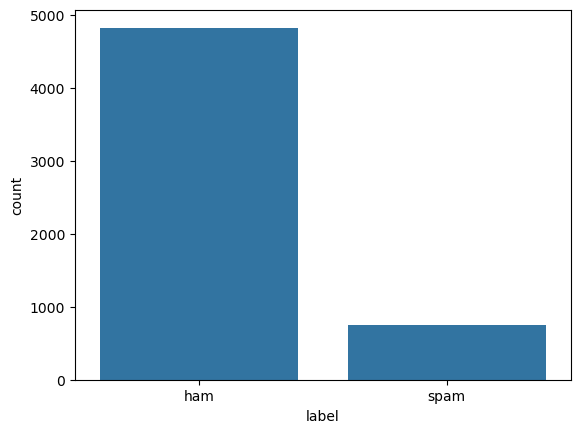

In [22]:
sns.countplot(x = y)

In [25]:
#data preprocessing 
"""
1. tokenize
2. remove punct
3. remove stopwards
4. remove suffixes to get root word
5. convert the data in number
""";

In [26]:
sent = "Hello friends! How are you? I like python programming."

In [27]:
sent

'Hello friends! How are you? I like python programming.'

In [28]:
#Tokenize

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
tokens1 = word_tokenize(sent)

In [32]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'python',
 'programming',
 '.']

In [41]:
filtered = []

In [45]:
for i in tokens1:
    if i.isalpha():
        filtered.append(i.lower())
        

In [46]:
filtered

['hello', 'friends', 'how', 'are', 'you', 'i', 'like', 'python', 'programming']

In [62]:
#Remove stop words

In [63]:
from nltk.corpus import stopwords

In [64]:
swords = stopwords.words('english')

In [65]:
swords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [69]:
tokens3 = [x for x in filtered if x not in swords]

In [71]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [72]:
#stemming


In [73]:
from nltk.stem import PorterStemmer

In [74]:
ps = PorterStemmer()

In [77]:
ps.stem('worked')

'work'

In [78]:
tokens4 = [ps.stem(x) for x in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [87]:
#create a funtion to clean the data


In [88]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # 1. Tokenize
    tokens = word_tokenize(text.lower())  # lowercase + tokenize

    # 2. Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # 3. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 4. Remove suffixes (get root words using stemming)
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens

In [89]:
text = "kalyani, is mad!!"
cleaned = clean_text(text)
print(cleaned)


['kalyani', 'mad']


In [90]:
#apply om entire input data

In [91]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [93]:
x.apply(lambda x: clean_text(x))

0       [go, jurong, point, crazi, .., avail, bugi, n,...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3       [u, dun, say, earli, hor, ..., u, c, alreadi, ...
4       [nah, n't, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u., u, £750, poun...
5568                       [ü, b, go, esplanad, fr, home]
5569                           [piti, mood, ..., suggest]
5570    [guy, bitch, act, like, 'd, interest, buy, som...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

# tf idf

In [102]:
sent =["IBM was founded in 1911 as the Computing-Tabulating-Recording Company (CTR), a holding company of manufacturers of record-keeping and measuring systems."
       "It was renamed International Business Machines in 1924 and soon became the leading manufacturer of punch-card tabulating systems."
       "During the 1960s and 1970s, the IBM mainframe, exemplified by the System/360 and its successors, was the world's dominant computing platform, with the company producing 80 percent of computers in the U.S. and 70 percent of computers worldwide." 
       "Embracing both business and scientific computing, System/360 was the first family of computers designed to cover a complete range of applications from small to large."]

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
tfidf = TfidfVectorizer()

In [106]:
sent_new = tfidf.fit_transform(sent)

In [107]:
sent_new.toarray();

In [108]:
tfidf.get_feature_names_out()

array(['1911', '1924', '1960s', '1970s', '360', '70', '80', 'and',
       'applications', 'as', 'became', 'both', 'business', 'by', 'card',
       'company', 'complete', 'computers', 'computing', 'cover', 'ctr',
       'designed', 'dominant', 'during', 'embracing', 'exemplified',
       'family', 'first', 'founded', 'from', 'holding', 'ibm', 'in',
       'international', 'it', 'its', 'keeping', 'large', 'leading',
       'machines', 'mainframe', 'manufacturer', 'manufacturers',
       'measuring', 'of', 'percent', 'platform', 'producing', 'punch',
       'range', 'record', 'recording', 'renamed', 'scientific', 'small',
       'soon', 'successors', 'system', 'systems', 'tabulating', 'the',
       'to', 'was', 'with', 'world', 'worldwide'], dtype=object)

In [110]:
sent_df =pd.DataFrame(data = sent_new.toarray(),
                columns=tfidf.get_feature_names_out())

In [111]:
sent_df

,1911,1924,1960s,1970s,360,70,80,and,applications,as,...,successors,system,systems,tabulating,the,to,was,with,world,worldwide
0,0.057735,0.057735,0.057735,0.057735,0.11547,0.057735,0.057735,0.34641,0.057735,0.057735,...,0.057735,0.11547,0.11547,0.11547,0.519615,0.11547,0.23094,0.057735,0.057735,0.057735


In [114]:
tfidf =  TfidfVectorizer(analyzer = clean_text)

In [115]:
x_new = tfidf.fit_transform(x)

In [117]:
x_new.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
x_new.shape

(5572, 7976)

In [120]:
#cross validiation

from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test , y_train, y_test = train_test_split(x_new, y,
                                                     random_state=0,
                                                     test_size=0.25
)

In [123]:
x_train.shape, y_train.shape

((4179, 7976), (4179,))

In [124]:
#decision tree

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

In [134]:
y_pred = dt_model.predict(x_test)


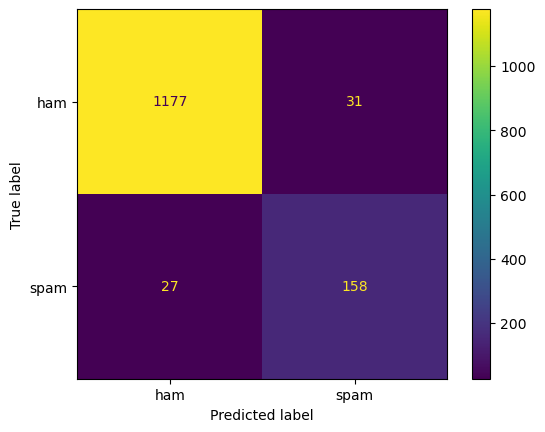

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      1208
        spam       0.84      0.85      0.84       185

    accuracy                           0.96      1393
   macro avg       0.91      0.91      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [138]:
df = pd.read_csv("sample.csv")

In [139]:
df

,Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,Unnamed: 1,Unnamed: 2
0,As a valued customer,I am pleased to advise you that following rec...,call 09066364589
1,"Today is ""song dedicated day.."" Which song wil...",NaN,NaN
